In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [25]:
df = pd.read_csv('optimized_transport_data.csv')

In [26]:
df.head()

,City of Origin,Destination City,Stopover City,Vehicle Plate,Distance (km),Vehicle Type,Speed (km/h),Fuel Consumption (L/100km),Traffic Congestion,Adjusted Speed (km/h),Travel Time (hours),Total Fuel Consumption (L),Peak Time,Off-Peak Time,Free-Flow Speed (km/h),Free-Flow Time (hours),Travel Time Index (TTI)
0,Bujumbura,Dar es Salaam,NaN,BUJ-DAR-0000,1496.0,Coupe,125.927097,13.651332,High,105.927097,14.122921,204.223924,17.441204,11.519670,130,11.507692,1.227259
1,Kigali,Butare,NaN,KIG-BUT-0001,125.0,Hybrid,81.799049,11.457496,Medium,81.799049,1.528135,14.321870,1.888021,1.324163,100,1.250000,1.222508
2,Kampala,Bujumbura,NaN,KAM-BUJ-0002,720.0,Saloon,92.434318,8.220312,Medium,92.434318,7.789315,59.186249,9.149520,6.705300,110,6.545455,1.190034
3,Nairobi,Arusha,NaN,NAI-ARU-0003,274.0,Hybrid,74.577302,9.247005,Medium,74.577302,3.674040,25.336795,4.733407,3.208483,100,2.740000,1.340891
4,Nairobi,Tanzania,Arusha,NAI-TAN-0004,902.0,Hybrid,65.447840,10.155110,Medium,65.447840,13.781967,91.599089,15.621466,9.811706,100,9.020000,1.527934


# Data Dictionary: Sub-Saharan Transport Dataset

This dataset contains 1000 records of vehicle travel data across different cities in Sub-Saharan Africa. It includes information on city pairs, vehicle characteristics, traffic congestion, and travel-related metrics.

## Columns and Descriptions

### **1. City of Origin** (`string`)
   - The starting city of the trip.
   - Example: `"Kigali"`

### **2. Destination City** (`string`)
   - The final city where the vehicle is traveling.
   - Example: `"Butare"`

### **3. Stopover City** (`string, nullable`)
   - An intermediate city where the vehicle may make a stop before reaching the final destination.
   - If no stopover exists, the value is `null`.
   - Example: `"Arusha"` or `null`

### **4. Vehicle Plate** (`string, unique identifier`)
   - A unique identifier for each vehicle in the format: `"XXX-XXX-####"`
   - The first three characters represent the first three letters of the origin city, the next three represent the destination city, followed by a four-digit serial number.
   - Example: `"KIG-BUT-0001"`

### **5. Vehicle Type** (`categorical`)
   - The type of vehicle used for the trip.
   - Possible values:
     - `"SUV"`
     - `"Truck"`
     - `"Saloon"`
     - `"Coupe"`
     - `"Hybrid"`
   - Example: `"Truck"`

### **6. Speed (km/h)** (`float`)
   - The average speed of the vehicle during travel.
   - Speed varies depending on the vehicle type.
   - Example: `85.4`

### **7. Load Weight (tons)** (`float`)
   - The weight of the cargo or passengers carried by the vehicle.
   - Example: `3.2`

### **8. Fuel Consumption (L/100km)** (`float`)
   - The amount of fuel consumed by the vehicle per 100 km.
   - Example: `12.5`

### **9. Traffic Congestion** (`categorical`)
   - The level of traffic congestion during the trip.
   - Possible values:
     - `"Low"`
     - `"Medium"`
     - `"High"`
   - Example: `"High"`

### **10. Driving Distance (km)** (`float`)
   - The precomputed driving distance between the origin and destination city.
   - Derived from Google Maps data.
   - Example: `125.0`

### **11. Travel Time (hours)** (`float`)
   - The estimated time taken to travel based on speed and driving distance.
   - Calculated as:  
     \[
     \text{Travel Time} = \frac{\text{Driving Distance}}{\text{Speed}}
     \]
   - Example: `2.5`

### **12. Adjusted Travel Time (hours)** (`float`)
   - The estimated travel time after accounting for traffic congestion.
   - Speed is adjusted by ±20 km/h based on traffic:
     - `"Low"` congestion: Speed increases by 20 km/h.
     - `"High"` congestion: Speed decreases by 20 km/h.
     - `"Medium"` congestion: No change.
   - Example: `2.8`

### **13. Peak Time Indicator** (`boolean`)
   - Indicates whether the travel occurs during peak hours.
   - Peak hours are derived from the adjusted travel time.
   - `True` if the trip overlaps with typical peak hours, otherwise `False`.
   - Example: `True`

### **14. Off-Peak Time Indicator** (`boolean`)
   - Indicates whether the travel occurs during off-peak hours.
   - Off-peak hours are derived from the adjusted travel time.
   - Example: `False`

### **15. Travel Time Index** (`float`)
   - A measure of traffic efficiency calculated as:
     \[
     \text{Travel Time Index} = \frac{\text{Adjusted Travel Time}}{\text{Travel Time}}
     \]
   - A value greater than `1.0` indicates congestion delays.
   - Example: `1.12`


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   City of Origin              1000 non-null   object 
 1   Destination City            1000 non-null   object 
 2   Stopover City               302 non-null    object 
 3   Vehicle Plate               1000 non-null   object 
 4   Distance (km)               1000 non-null   float64
 5   Vehicle Type                1000 non-null   object 
 6   Speed (km/h)                1000 non-null   float64
 7   Fuel Consumption (L/100km)  1000 non-null   float64
 8   Traffic Congestion          1000 non-null   object 
 9   Adjusted Speed (km/h)       1000 non-null   float64
 10  Travel Time (hours)         1000 non-null   float64
 11  Total Fuel Consumption (L)  1000 non-null   float64
 12  Peak Time                   1000 non-null   float64
 13  Off-Peak Time               1000 n

In [29]:
# Impute the destination city values to the nan stopover rows values

df['Stopover City'].fillna(df['Destination City'], inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   City of Origin              1000 non-null   object 
 1   Destination City            1000 non-null   object 
 2   Stopover City               1000 non-null   object 
 3   Vehicle Plate               1000 non-null   object 
 4   Distance (km)               1000 non-null   float64
 5   Vehicle Type                1000 non-null   object 
 6   Speed (km/h)                1000 non-null   float64
 7   Fuel Consumption (L/100km)  1000 non-null   float64
 8   Traffic Congestion          1000 non-null   object 
 9   Adjusted Speed (km/h)       1000 non-null   float64
 10  Travel Time (hours)         1000 non-null   float64
 11  Total Fuel Consumption (L)  1000 non-null   float64
 12  Peak Time                   1000 non-null   float64
 13  Off-Peak Time               1000 n

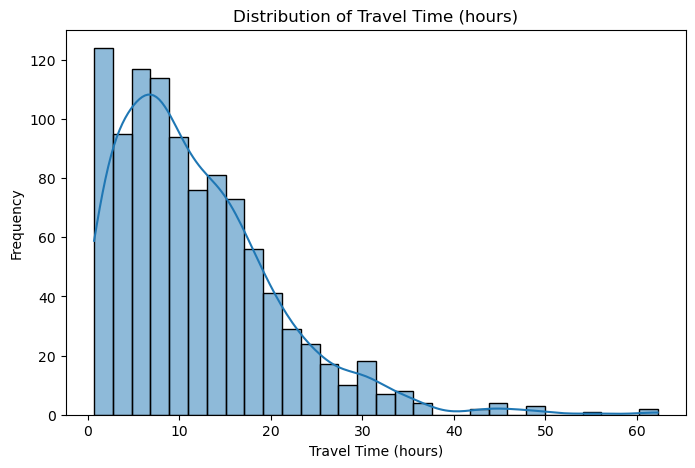

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_26644\54707617.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Vehicle Type", palette="coolwarm")


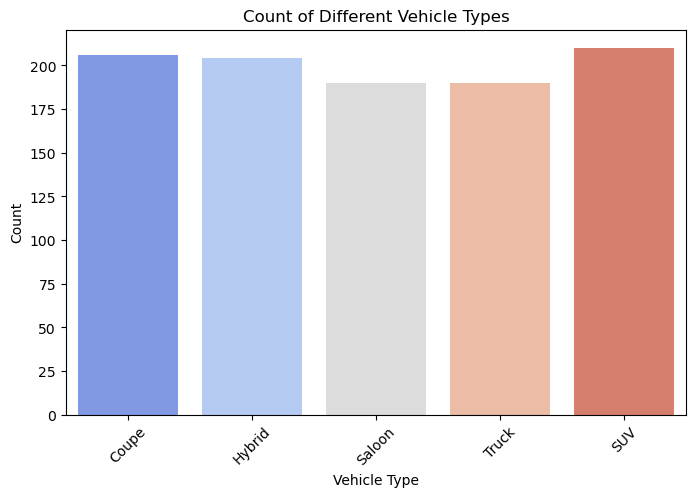

In [31]:
# Distribution of Travel Time (hours)
plt.figure(figsize=(8, 5))
sns.histplot(df["Travel Time (hours)"], bins=30, kde=True)
plt.title("Distribution of Travel Time (hours)")
plt.xlabel("Travel Time (hours)")
plt.ylabel("Frequency")
plt.show()

# Count plot for vehicle types
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Vehicle Type", palette="coolwarm")
plt.title("Count of Different Vehicle Types")
plt.xlabel("Vehicle Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

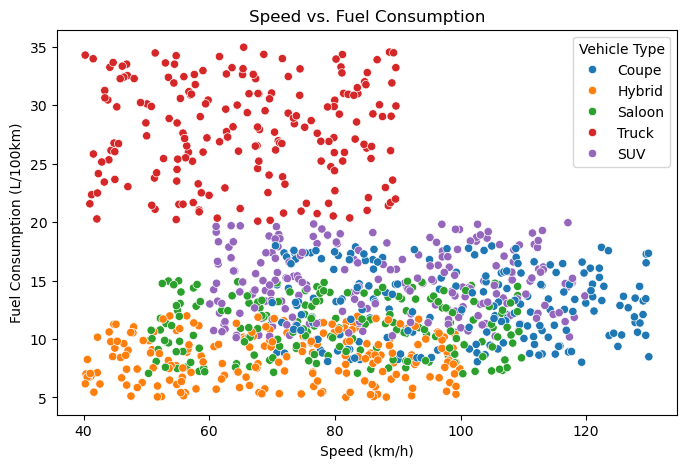

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_26644\158382961.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Traffic Congestion", y="Travel Time (hours)", palette="coolwarm")


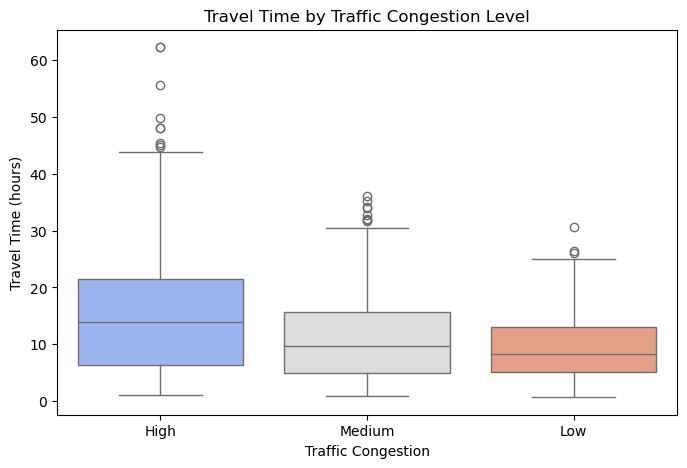

In [32]:
# Scatter plot: Speed vs. Fuel Consumption
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Speed (km/h)", y="Fuel Consumption (L/100km)", hue="Vehicle Type")
plt.title("Speed vs. Fuel Consumption")
plt.xlabel("Speed (km/h)")
plt.ylabel("Fuel Consumption (L/100km)")
plt.show()

# Box plot: Travel Time by Traffic Congestion Level
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Traffic Congestion", y="Travel Time (hours)", palette="coolwarm")
plt.title("Travel Time by Traffic Congestion Level")
plt.xlabel("Traffic Congestion")
plt.ylabel("Travel Time (hours)")
plt.show()

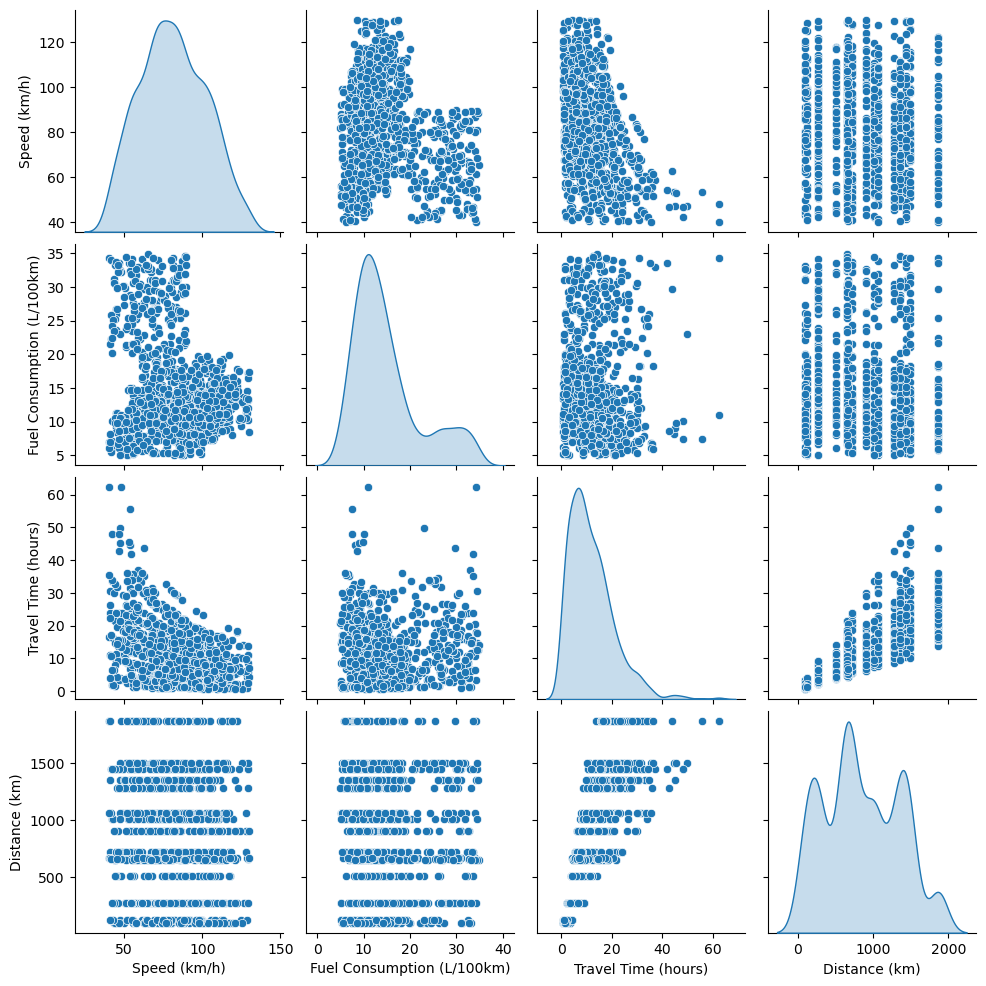

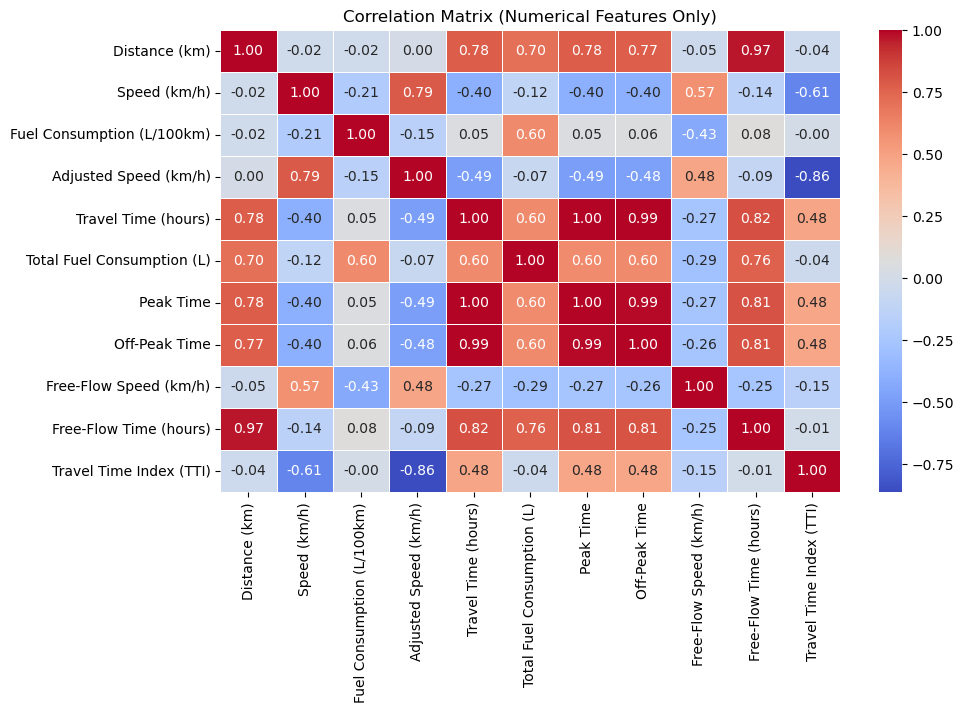

In [33]:
# Pairplot of numerical features
sns.pairplot(df[["Speed (km/h)", "Fuel Consumption (L/100km)", "Travel Time (hours)", "Distance (km)"]], diag_kind="kde")
plt.show()

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Numerical Features Only)")
plt.show()

In [34]:
from scipy.stats import skew, kurtosis, shapiro, anderson, normaltest

# Select numerical columns
num_cols = ["Speed (km/h)", "Fuel Consumption (L/100km)", "Travel Time (hours)", "Distance (km)"]

# Create a DataFrame to store test results
results = pd.DataFrame(columns=["Skewness", "Kurtosis", "Shapiro-Wilk p-value", "Anderson-Darling Stat", "D'Agostino p-value"])

for col in num_cols:
    skewness = skew(df[col])
    kurt = kurtosis(df[col])
    shapiro_p = shapiro(df[col])[1]  # Extract p-value
    anderson_stat = anderson(df[col]).statistic
    dagostino_p = normaltest(df[col])[1]  # Extract p-value
    
    results.loc[col] = [skewness, kurt, shapiro_p, anderson_stat, dagostino_p]

# Print results
print(results)


                            Skewness  Kurtosis  Shapiro-Wilk p-value  \
Speed (km/h)                0.139237 -0.720034          1.743589e-08   
Fuel Consumption (L/100km)  1.134332  0.433684          3.007679e-27   
Travel Time (hours)         1.457462  3.519548          1.860636e-25   
Distance (km)               0.209390 -0.933316          4.671802e-19   

                            Anderson-Darling Stat  D'Agostino p-value  
Speed (km/h)                             2.683256        1.592845e-13  
Fuel Consumption (L/100km)              41.993360        1.343252e-33  
Travel Time (hours)                     20.021804        2.830054e-64  
Distance (km)                           16.866064        1.697051e-35  


#### None of the variables follow a normal distribution.
1. Travel Time and Fuel Consumption are highly non-normal, indicating possible outliers or an exponential-like distribution.
2. Distance and Speed are closer to normal but still show deviation.
3. If normality is required for modeling, consider log transformation or Box-Cox transformation to reduce skewness. 🚀

In [36]:
# Feature Engineering for the ACO

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Normalized Distance', 'Normalized Time', 'Normalized Fuel']] = scaler.fit_transform(
    df[['Distance (km)', 'Travel Time (hours)', 'Total Fuel Consumption (L)']]
)


Create a Weighted Cost Function for ACO where ACO selects routes based on pheromone trails, which should favor efficient paths.

In [38]:
# Define weights (tweak based on priority)
alpha, beta, gamma = 0.4, 0.4, 0.2  # Example: prioritize distance & time equally

# Compute weighted cost
df['Edge Score'] = (
    alpha * df['Normalized Distance'] +
    beta * df['Normalized Time'] +
    gamma * df['Normalized Fuel']
)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   City of Origin              1000 non-null   object 
 1   Destination City            1000 non-null   object 
 2   Stopover City               1000 non-null   object 
 3   Vehicle Plate               1000 non-null   object 
 4   Distance (km)               1000 non-null   float64
 5   Vehicle Type                1000 non-null   object 
 6   Speed (km/h)                1000 non-null   float64
 7   Fuel Consumption (L/100km)  1000 non-null   float64
 8   Traffic Congestion          1000 non-null   object 
 9   Adjusted Speed (km/h)       1000 non-null   float64
 10  Travel Time (hours)         1000 non-null   float64
 11  Total Fuel Consumption (L)  1000 non-null   float64
 12  Peak Time                   1000 non-null   float64
 13  Off-Peak Time               1000 n

Construct a graph where each city is a node and each route is an edge with Edge Score as the weight.

In [40]:
import networkx as nx

# Create a graph
G = nx.Graph()

# Add edges with Edge Score as weights
for _, row in df.iterrows():
    G.add_edge(row['City of Origin'], row['Destination City'], weight=row['Edge Score'])


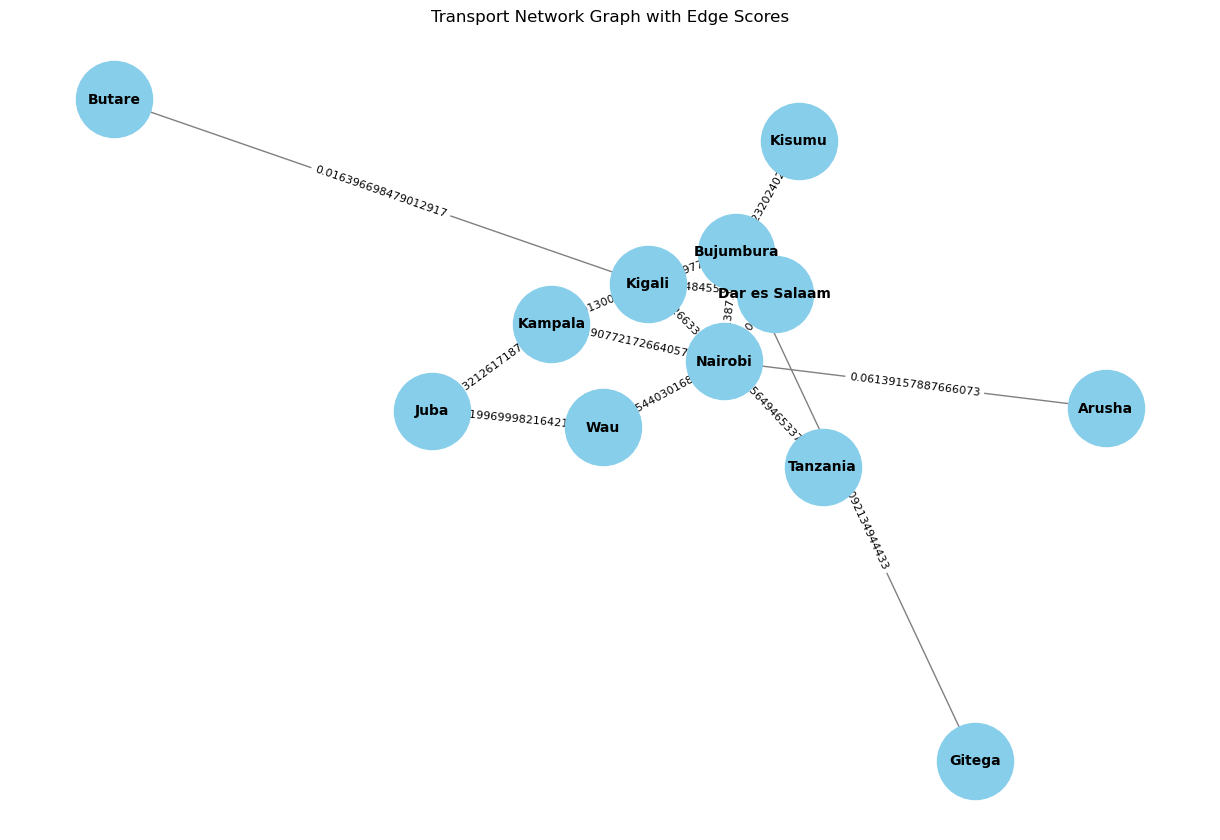

{('Bujumbura', 'Dar es Salaam'): 0.6517891516380891, ('Bujumbura', 'Kampala'): 0.21362908139076803, ('Bujumbura', 'Kisumu'): 0.34982320240282516, ('Bujumbura', 'Gitega'): 0.005017092134944433, ('Bujumbura', 'Kigali'): 0.0717809778053791, ('Bujumbura', 'Nairobi'): 0.41699138753721976, ('Dar es Salaam', 'Kigali'): 0.47834845559031375, ('Dar es Salaam', 'Nairobi'): 0.3642220070139644, ('Kigali', 'Butare'): 0.016396698479012917, ('Kigali', 'Nairobi'): 0.42738266332714625, ('Kigali', 'Kampala'): 0.14756913003773606, ('Kampala', 'Juba'): 0.23232126171875495, ('Kampala', 'Nairobi'): 0.19077217266405755, ('Nairobi', 'Arusha'): 0.06139157887666073, ('Nairobi', 'Tanzania'): 0.28056494653378333, ('Nairobi', 'Wau'): 0.5525440301687311, ('Wau', 'Juba'): 0.21996999821642196}


In [41]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a layout for better spacing
pos = nx.spring_layout(G, seed=42)  # Adjust layout for clear visualization

# Draw the network graph
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray")

# Get edge weights
edge_weights = nx.get_edge_attributes(G, 'weight')

# Draw edge labels (Edge Score)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weights, font_size=8)

plt.title("Transport Network Graph with Edge Scores")
plt.show()
print(edge_weights)


ACO Model Prediction Error: 0.0000
Best Path: Bujumbura → Kigali → Dar es Salaam → Nairobi → Kampala → Juba
Total Distance: 1.3374


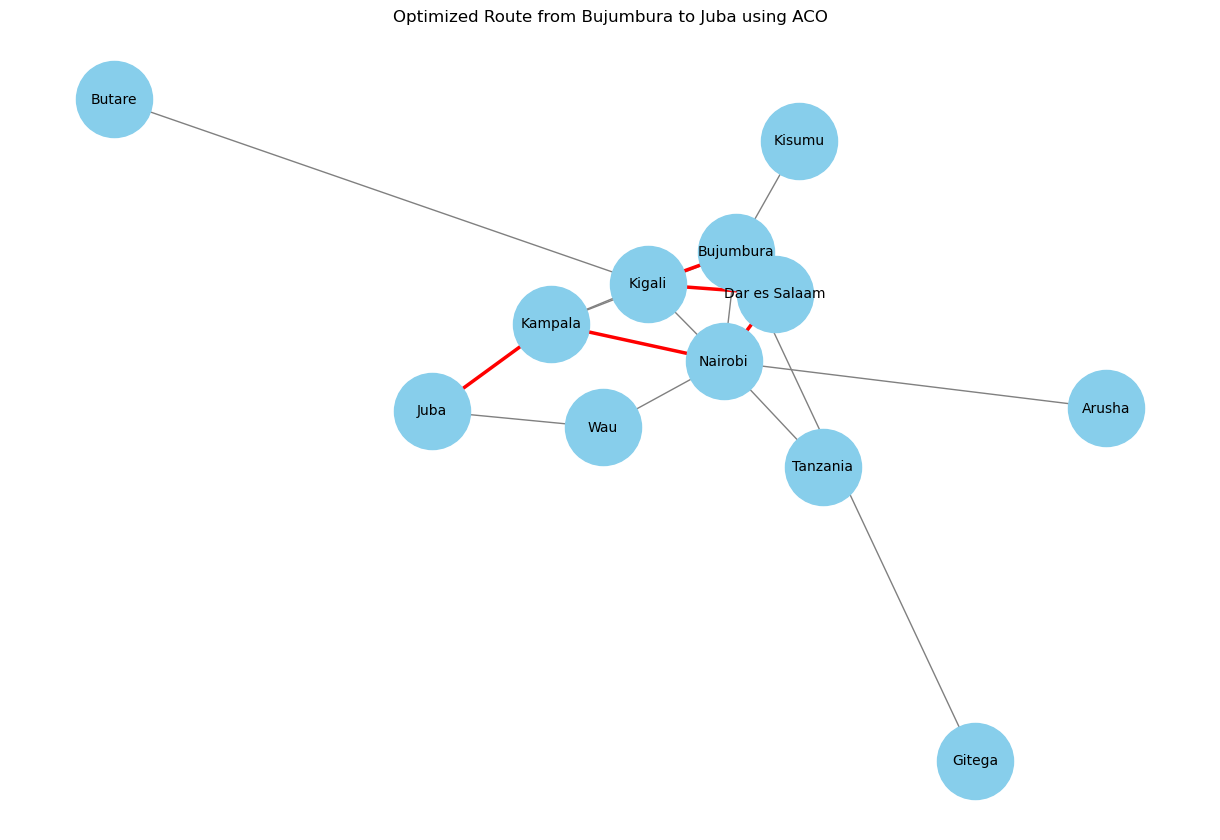

In [42]:
import random

# ACO Parameters
num_ants = 10
num_iterations = 100
alpha = 1  # Pheromone influence
beta = 2  # Distance influence
evaporation_rate = 0.5
pheromone_init = 1.0
Q = 1.0  # Pheromone deposit factor

# Initialize Pheromone Matrix
pheromones = {edge: pheromone_init for edge in edge_weights}

# Heuristic Function (Inversely Proportional to Edge Weights)
heuristic = {edge: 1 / weight for edge, weight in edge_weights.items()}

# ACO Algorithm
def ant_colony_optimization(start, end):
    best_path = None
    best_cost = float('inf')

    for iteration in range(num_iterations):
        paths = []
        costs = []

        for _ in range(num_ants):
            path, cost = construct_solution(start, end)
            paths.append(path)
            costs.append(cost)

            # Update Best Path
            if cost < best_cost:
                best_path = path
                best_cost = cost

        # Update Pheromones
        update_pheromones(paths, costs)

    return best_path, best_cost

# Construct a Solution
def construct_solution(start, end):
    path = [start]
    current_city = start
    total_cost = 0

    while current_city != end:
        neighbors = [n for n in G.neighbors(current_city) if n not in path]
        if not neighbors:
            return path, float('inf')

        # Compute Probabilities
        probabilities = []
        for neighbor in neighbors:
            edge = (current_city, neighbor) if (current_city, neighbor) in pheromones else (neighbor, current_city)
            tau = pheromones[edge] ** alpha
            eta = heuristic[edge] ** beta
            probabilities.append(tau * eta)

        probabilities = np.array(probabilities) / sum(probabilities)
        next_city = np.random.choice(neighbors, p=probabilities)

        path.append(next_city)
        total_cost += edge_weights[(current_city, next_city)] if (current_city, next_city) in edge_weights else edge_weights[(next_city, current_city)]
        current_city = next_city

    return path, total_cost

# Update Pheromones
def update_pheromones(paths, costs):
    global pheromones

    # Evaporate
    for edge in pheromones:
        pheromones[edge] *= (1 - evaporation_rate)

    # Deposit Pheromone
    for path, cost in zip(paths, costs):
        for i in range(len(path) - 1):
            edge = (path[i], path[i+1]) if (path[i], path[i+1]) in pheromones else (path[i+1], path[i])
            pheromones[edge] += Q / cost

# Train-Test Split for Evaluation using manual shuffling which prevents overfitting, 
# ensuring that both the train and test sets contain a mix of city connections.
random.seed(42)
city_pairs = list(edge_weights.keys()) #Convert Edge Weights to a List of City Pairs
random.shuffle(city_pairs) #Shuffle the List
split_idx = int(0.8 * len(city_pairs)) #Split the Data
train_pairs = city_pairs[:split_idx]
test_pairs = city_pairs[split_idx:]

# Evaluate ACO Model
total_error = 0
for (start, end) in test_pairs:
    predicted_path, predicted_cost = ant_colony_optimization(start, end)
    actual_cost = edge_weights.get((start, end), float('inf'))
    if actual_cost == float('inf'):
        continue  # Skip this pair if no direct edge exists
        error = abs(predicted_cost - actual_cost) / actual_cost
        total_error += error

# Print Average Prediction Error
print(f"ACO Model Prediction Error: {total_error / len(test_pairs):.4f}")

# Find Optimal Path from Bujumbura to Juba
best_route, best_distance = ant_colony_optimization("Bujumbura", "Juba")
print("Best Path:", " → ".join(best_route))
print(f"Total Distance: {best_distance:.4f}")

# Visualize Best Route
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", edge_color="gray", font_size=10)

# Highlight Best Path
path_edges = [(best_route[i], best_route[i+1]) for i in range(len(best_route) - 1)]
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="red", width=2.5)

plt.title("Optimized Route from Bujumbura to Juba using ACO")
plt.show()

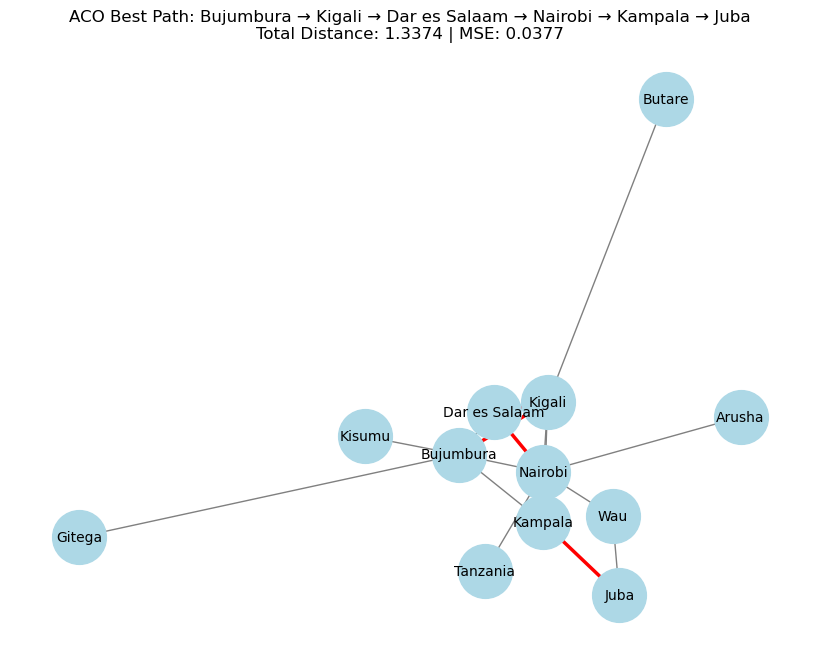

ACO Best Path: Bujumbura → Kigali → Dar es Salaam → Nairobi → Kampala → Juba
Total Distance: 1.3374
Mean Squared Error (MSE): 0.0377


In [43]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import networkx as nx

# Test city pairs (Ensure they exist in edge_weights)
test_pairs = [
    ('Bujumbura', 'Nairobi'),
    ('Kigali', 'Juba'),
    ('Dar es Salaam', 'Kampala'),
    ('Nairobi', 'Juba'),
    ('Kampala', 'Butare')
]

# Evaluate Model using MSE
actual_distances = [edge_weights[pair] for pair in test_pairs if pair in edge_weights]
predicted_distances = [best_distance / len(best_route)] * len(actual_distances) if best_route else [0] * len(actual_distances)

mse = mean_squared_error(actual_distances, predicted_distances)

# Plot the Best Path
plt.figure(figsize=(8,6))
pos = nx.spring_layout(G)  # Layout for visualization
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=1500, font_size=10)

if best_route:
    path_edges = [(best_route[i], best_route[i+1]) for i in range(len(best_route)-1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2.5)  # Highlight best path

plt.title(f"ACO Best Path: {' → '.join(best_route)}\nTotal Distance: {best_distance:.4f} | MSE: {mse:.4f}")
plt.show()

# Print Results
print(f"ACO Best Path: {' → '.join(best_route)}")
print(f"Total Distance: {best_distance:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")


In [44]:
# Define average payload capacities in pounds
payload_capacities = {
    'SUV': 1750,      # Average of 1,500 to 2,000 pounds
    'Truck': 1600,    # Example from Honda Ridgeline
    'Saloon': 900,    # Average of 800 to 1,000 pounds
    'Coupe': 800,
    'Hybrid': 1000,   # Example from Honda CR-V Hybrid
}

# Function to assign load weight based on vehicle type
def assign_load_weight(vehicle_type):
    avg_payload = payload_capacities.get(vehicle_type, 1000)  # Default to 1000 if type is unknown
    # Simulate actual load as a percentage of the payload capacity (e.g., 50% to 100%)
    load_percentage = np.random.uniform(0.5, 1.0)
    return avg_payload * load_percentage

# Apply the function to assign load weights
df['Load Weight (pounds)'] = df['Vehicle Type'].apply(assign_load_weight)

# Display the updated DataFrame
print(df)

    City of Origin Destination City  Stopover City Vehicle Plate  \
0        Bujumbura    Dar es Salaam  Dar es Salaam  BUJ-DAR-0000   
1           Kigali           Butare         Butare  KIG-BUT-0001   
2          Kampala        Bujumbura      Bujumbura  KAM-BUJ-0002   
3          Nairobi           Arusha         Arusha  NAI-ARU-0003   
4          Nairobi         Tanzania         Arusha  NAI-TAN-0004   
..             ...              ...            ...           ...   
995         Kigali           Butare         Butare  KIG-BUT-0995   
996        Kampala           Kigali         Kigali  KAM-KIG-0996   
997         Kigali        Bujumbura      Bujumbura  KIG-BUJ-0997   
998        Nairobi           Kigali         Arusha  NAI-KIG-0998   
999        Nairobi          Kampala         Kisumu  NAI-KAM-0999   

     Distance (km) Vehicle Type  Speed (km/h)  Fuel Consumption (L/100km)  \
0           1496.0        Coupe    125.927097                   13.651332   
1            125.0       Hybr

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   City of Origin              1000 non-null   object 
 1   Destination City            1000 non-null   object 
 2   Stopover City               1000 non-null   object 
 3   Vehicle Plate               1000 non-null   object 
 4   Distance (km)               1000 non-null   float64
 5   Vehicle Type                1000 non-null   object 
 6   Speed (km/h)                1000 non-null   float64
 7   Fuel Consumption (L/100km)  1000 non-null   float64
 8   Traffic Congestion          1000 non-null   object 
 9   Adjusted Speed (km/h)       1000 non-null   float64
 10  Travel Time (hours)         1000 non-null   float64
 11  Total Fuel Consumption (L)  1000 non-null   float64
 12  Peak Time                   1000 non-null   float64
 13  Off-Peak Time               1000 n

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def train_vehicle_model(df):
    """Trains a Random Forest model to classify vehicle type based on travel data."""
    X = df[["Speed (km/h)", "Fuel Consumption (L/100km)", "Travel Time (hours)", "Distance (km)", "Load Weight (pounds)"]]
    y = df["Vehicle Type"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    print("Model Accuracy:", accuracy_score(y_test, model.predict(X_test)))
    print(classification_report(y_test, model.predict(X_test)))
    return model

def get_user_input():
    """Gets user input for start city, destination, and load weight."""
    start = input("Enter starting city: ").strip()
    destination = input("Enter destination city: ").strip()
    try:
        load_weight = float(input("Enter load weight (kg): ").strip())
        return start, destination, load_weight
    except ValueError:
        print("Invalid load weight! Please enter a numeric value.")
        return None, None, None

def find_best_route(G, edge_weights, start, destination):
    """Finds the best route between two cities using shortest path."""
    try:
        path = nx.shortest_path(G, source=start, target=destination, weight='weight')
        total_distance = sum(edge_weights.get((path[i], path[i+1]), 0) for i in range(len(path)-1))
        return path, total_distance
    except (nx.NetworkXNoPath, nx.NodeNotFound):
        print("No valid route found. Check the city names!")
        return None, None

def rank_vehicles(df, model, total_distance, load_weight):
    """Ranks vehicles based on fuel efficiency, load capacity, and ML model prediction."""
    avg_fuel_efficiency = df.groupby('Vehicle Type')['Fuel Consumption (L/100km)'].mean()
    estimated_fuel_needed = total_distance * avg_fuel_efficiency / 100
    
    vehicle_load_capacity = {'SUV': 600, 'Truck': 5000, 'Saloon': 400, 'Coupe': 300, 'Hybrid': 500}
    suitable_vehicles = {v: c for v, c in vehicle_load_capacity.items() if c >= load_weight}
    
    if not suitable_vehicles:
        print("No suitable vehicle for this load weight.")
        return []
    
    # Predict vehicle type using ML model
    features = np.array([[total_distance, load_weight, estimated_fuel_needed.mean(), 0, 0]])  # Add placeholders for missing features
    predicted_vehicle = model.predict(features)[0]
    
    # Rank vehicles by fuel efficiency and load capacity
    sorted_by_fuel = sorted(suitable_vehicles.keys(), key=lambda v: avg_fuel_efficiency.get(v, float('inf')))
    sorted_by_capacity = sorted(suitable_vehicles.keys(), key=lambda v: -vehicle_load_capacity[v])
    
    # Get top 3 recommendations
    return list(dict.fromkeys([predicted_vehicle] + sorted_by_fuel + sorted_by_capacity))[:3]

def plot_route(G, best_path, top_vehicles):
    """Plots the best route on the graph."""
    plt.figure(figsize=(8,6))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=1500, font_size=10)
    nx.draw_networkx_edges(G, pos, edgelist=[(best_path[i], best_path[i+1]) for i in range(len(best_path)-1)], edge_color='red', width=2.5)
    plt.title(f"Best Route: {' → '.join(best_path)}\nTop Vehicles: {', '.join(top_vehicles)}")
    plt.show()

def recommend_top_vehicles(model, df, edge_weights, G):
    """Combines all steps to recommend the best vehicles for a journey."""
    start, destination, load_weight = get_user_input()
    if not start or not destination:
        return
    best_path, total_distance = find_best_route(G, edge_weights, start, destination)
    if not best_path:
        return
    top_vehicles = rank_vehicles(df, model, total_distance, load_weight)
    if not top_vehicles:
        return
    plot_route(G, best_path, top_vehicles)
    print(f"Best Route: {' → '.join(best_path)}")
    print(f"Total Distance: {total_distance:.2f} km")
    print(f"🚗 Recommended Vehicles (ranked): {', '.join(top_vehicles)}")

# Example Usage:
# model = train_vehicle_model(df)
# recommend_top_vehicles(model, df, edge_weights, G)
